## Prova 2 - C210 - L1
-------------------------------------------------------------------------------------------------------------------------------------------------------------
#### Nome: Dimitri Schulz Amado
#### Matrícula: 412

-------------------------------------------------------------------------------------------------------------------------------------------------------------

## Instruções:
- A prova deve ser resolvida em 1h30min.
- A prova é Individual.
- Resolver as questões e enviar as respostas através desse Jupyter Notebook.
- Interpretação faz parte da prova.
- Não será permitida qualquer tipo de consulta, exceto à folha de resumo escrita e individual.

Boa Prova.

# (15 Pontos) **`Questão 1`**
Qual a principal diferença entre as redes: Adaline e Perceptron?






R: Adaline usa função de ativação linear, ja Perceptron usa função não-linear

# (25 Pontos) **`Questão 2`**

Faça a classificação das espécies de plantas utilizando a rede perceptron.

A) Dividir os dados em conjuntos de treino (70%) e teste (30%) utilizando a `from sklearn.model_selection import` **`train_test_split`**

B) Treinar e testar o Perceptron

C) Testar o Perceptron com dados de teste

D) Mostrar os resultados

E) Calcular e mostrar a acurácia


In [1]:
data = """
distancia,intensidade,tipo
0.5,0.8,"proximo"
0.7,0.9,"proximo"
0.6,0.75,"proximo"
0.4,0.85,"proximo"
0.8,0.7,"proximo"
0.9,0.6,"proximo"
0.55,0.82,"proximo"
0.65,0.78,"proximo"
0.52,0.88,"proximo"
0.57,0.79,"proximo"
2.2,0.3,"distante"
2.5,0.35,"distante"
2.8,0.32,"distante"
2.4,0.28,"distante"
2.7,0.31,"distante"
3.0,0.25,"distante"
2.6,0.30,"distante"
2.9,0.34,"distante"
2.3,0.29,"distante"
3.1,0.27,"distante"
"""


In [3]:
class Perceptron:
    
    def __init__(self, lr, n_epochs):
        self.lr = lr
        self.n_epochs = n_epochs
        
    def activation(self, value):
        return (1 if value > 0 else -1 if value < 0 else 0)
        
    def predict(self, x):
        return np.dot(x, self.weights.T) + self.bias * self.w_bias
    
    def evaluate(self, target, predicted):
        return (target - predicted)
    
    def train(self, x, d):
        self.weights = np.random.random(x.shape[1])
        self.bias = np.random.random()
        self.w_bias = np.random.random()
        
        epoch = 0
        is_error = True
        self.total_error = []
        
        while is_error and epoch < self.n_epochs:
            is_error  = False
            epoch_errors = 0
            
            for xi, target in zip(x, d):
                predicted = self.predict(xi)
                predicted = self.activation(predicted)
                
                current_error = self.evaluate(target, predicted)
                epoch_errors += abs(current_error)
                
                if predicted != target:
                    self.weights += self.lr * current_error * xi
                    self.w_bias += self.lr * current_error * self.bias
                    is_error = True
                    
            self.total_error.append(epoch_errors / len(x))
            epoch += 1
    
    def accuracy(self, x, d):
        correct_predictions = 0
        total_predictions = len(d)
        
        for xi, target in zip(x, d):
            predicted = self.predict(xi)
            predicted = self.activation(predicted)
            if predicted == target:
                correct_predictions += 1
                
        return correct_predictions / total_predictions
    
    def test(self, x):
        results = []
        for xi in x:
            predict = self.predict(xi)
            predict = self.activation(predict)
            results.append(predict)
            
        return results


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Converter a string data para DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Pré-processamento dos dados
# Converter classes para numérico
df['tipo'] = df['tipo'].apply(lambda x: 1 if x == 'proximo' else -1)

# Separar features e rótulos
X = df[['distancia', 'intensidade']].values
y = df['tipo'].values

# 1. Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 2. Treinar o Perceptron
perceptron = Perceptron(lr=0.1, n_epochs=100)
perceptron.train(X_train, y_train)

# 3. Testar o Perceptron
predictions = perceptron.test(X_test)

# 4. Mostrar os resultados
for i in range(len(X_test)):
    print(f"Entrada: {X_test[i]}, Predição: {predictions[i]}, Verdadeiro: {y_test[i]}")

# 5. Calcular e mostrar a acurácia
accuracy = np.mean(predictions == y_test)
print(f"Acurácia no teste: {accuracy:.2f}")


Entrada: [0.5 0.8], Predição: 1, Verdadeiro: 1
Entrada: [2.9  0.34], Predição: -1, Verdadeiro: -1
Entrada: [3.   0.25], Predição: -1, Verdadeiro: -1
Entrada: [0.7 0.9], Predição: 1, Verdadeiro: 1
Acurácia no teste: 1.00


# (50 Pontos) **`Questão 3`**

Uma possível aplicação para sistemas fuzzy é o controle automático de ventilação de ambientes industriais.

Implemente o seguinte sistema fuzzy utilizando as informações abaixo.


A) (20 Pontos) Desenhe (mostre os gráficos) das funções de pertinência das variáveis fuzzy:

Umidade do Solo

Temperatura Ambiente

Vazão da Irrigação


B) (30 Pontos) Calcule a vazão final do sistema fuzzy para os seguintes valores de entrada:

umidade: 15; temperatura: 32

umidade: 55; temperatura: 20

umidade: 80; temperatura: 14

umidade: 10; temperatura: 26

<!DOCTYPE html>
<html lang="pt-br">
<head>
    <meta charset="UTF-8">
    <title>Tabelas de Variáveis</title>
    <style>
        table {
            width: 60%;
            border-collapse: collapse;
            margin: 20px 0;
        }
        th, td {
            border: 1px solid black;
            padding: 10px;
            text-align: center;
        }
        th { background-color: `#2943abff; }
    </style>
</head>
<body>

<h2>Variáveis de Entrada</h2>
<table>
    <thead>
        <tr>
            <th>Variável de Entrada</th>
            <th>Valor mínimo (inclusive)</th>
            <th>Valor máximo (inclusive)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Umidade do Solo</td>
            <td>0</td>
            <td>100</td>
        </tr>
        <tr>
            <td>Temperatura Ambiente</td>
            <td>5</td>
            <td>45</td>
        </tr>
    </tbody>
</table>

<h2>Variáveis de Saída</h2>
<table>
    <thead>
        <tr>
            <th>Variável de Saída</th>
            <th>Valor mínimo (inclusive)</th>
            <th>Valor máximo (inclusive)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Vazão da Irrigação</td>
            <td>0</td>
            <td>120</td>
        </tr>
    </tbody>
</table>

</body>
</html>


In [15]:
import numpy as np
import skfuzzy as fuzzy
import skfuzzy.control as ctrl

/Users/schulzdimitrii/Documents/GitHub-Projects/Inteligencia-Computacional/.venv/lib/python3.13/site-packages/skfuzzy/control/fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


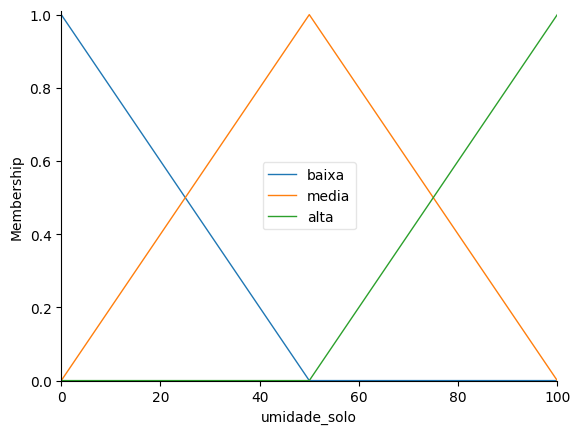

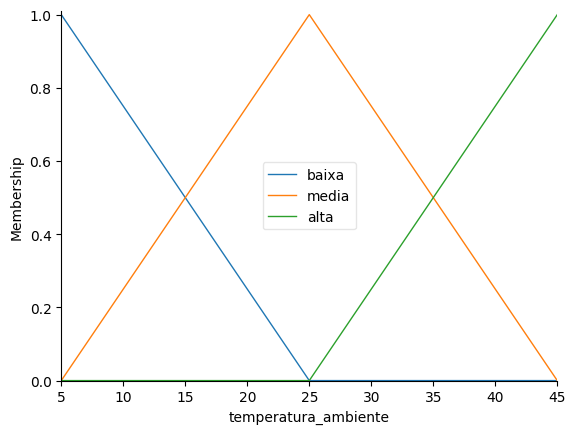

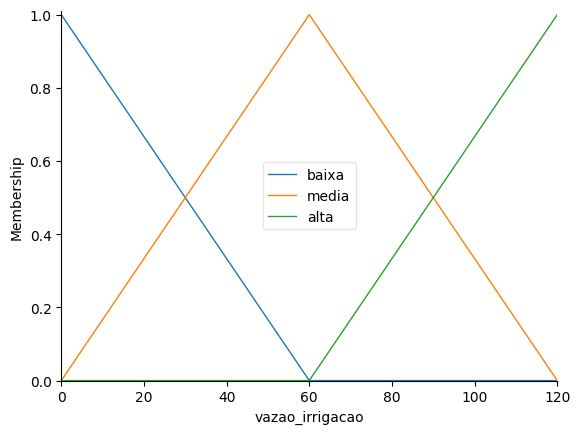

In [17]:
# Definindo universo de discurso
umidade_solo = ctrl.Antecedent(np.arange(0, 101, 1), 'umidade_solo')
temperatura_ambiente = ctrl.Antecedent(np.arange(5, 46, 1), 'temperatura_ambiente')

# Funções de pertinência
umidade_solo.automf(names=['baixa', 'media', 'alta'])
temperatura_ambiente.automf(names=['baixa', 'media', 'alta'])

# Gráficos:
umidade_solo.view()
temperatura_ambiente.view()

vazao_irrigacao = ctrl.Consequent(np.arange(0, 121, 1), 'vazao_irrigacao')
vazao_irrigacao.automf(names=['baixa', 'media', 'alta'])

# Gráfico:
vazao_irrigacao.view()


Utilize a seguinte matriz de regras abaixo,
considerando sempre o conectivo **E**:

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Data Table</title>
    <style>
        table {
            width: 50%;
            border-collapse: collapse;
            margin: 25px 0;
            font-size: 18px;
            text-align: left;
        }
        th, td {
            padding: 12px;
            border: 1px solid #ddd;
        }
        th {
            background-color: #234de6ff;
        }
        td:first-child, th:first-child {
            background-color: #234de6ff;
            font-weight: bold;
        }
    </style>
</head>
<body>
    <table>
        <thead>
            <tr>
                <th></th>
                <th>Baixa</th>
                <th>Média</th>
                <th>Alta</th>
                <th>Temperatura</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>Baixa</td>
                <td>Alta</td>
                <td>Média</td>
                <td>Baixa</td>
            </tr>
            <tr>
                <td>Média</td>
                <td>Alta</td>
                <td>Média</td>
                <td>Baixa</td>
            </tr>
            <tr>
                <td>Alta</td>
                <td>Média</td>
                <td>Baixa</td>
                <td>Baixa</td>
            </tr>
            <tr>
                <td>Humidade</td>
            </tr>
        </tbody>
    </table>
</body>
</html>


In [23]:
# Regras fuzzy
regra1 = ctrl.Rule(umidade_solo['baixa'] & temperatura_ambiente['baixa'], vazao_irrigacao['alta'])
regra2 = ctrl.Rule(umidade_solo['baixa'] & temperatura_ambiente['media'], vazao_irrigacao['media'])
regra3 = ctrl.Rule(umidade_solo['baixa'] & temperatura_ambiente['alta'], vazao_irrigacao['baixa'])

regra4 = ctrl.Rule(umidade_solo['media'] & temperatura_ambiente['baixa'], vazao_irrigacao['alta'])
regra5 = ctrl.Rule(umidade_solo['media'] & temperatura_ambiente['media'], vazao_irrigacao['media'])
regra6 = ctrl.Rule(umidade_solo['media'] & temperatura_ambiente['alta'], vazao_irrigacao['baixa'])

regra7 = ctrl.Rule(umidade_solo['alta'] & temperatura_ambiente['baixa'], vazao_irrigacao['media'])
regra8 = ctrl.Rule(umidade_solo['alta'] & temperatura_ambiente['media'], vazao_irrigacao['baixa'])
regra9 = ctrl.Rule(umidade_solo['alta'] & temperatura_ambiente['alta'], vazao_irrigacao['baixa'])


In [25]:
sistema = ctrl.ControlSystem([regra1, regra2, regra3,
                              regra4, regra5, regra6,
                              regra7, regra8, regra9])

simulador = ctrl.ControlSystemSimulation(sistema)

# Entrada 1
simulador.input['umidade_solo'] = 15
simulador.input['temperatura_ambiente'] = 32

simulador.compute()

print(f"Umidade do solo: 15 e Temperatura ambiente: 32")
print(f"Vazão da Irrigação: {simulador.output['vazao_irrigacao']}")

# Entrada 2
simulador.input['umidade_solo'] =55
simulador.input['temperatura_ambiente'] = 20

simulador.compute()

print(f"\nUmidade do solo: 55 e Temperatura ambiente: 20")
print(f"Vazão da Irrigação: {simulador.output['vazao_irrigacao']}")

# Entrada 3
simulador.input['umidade_solo'] = 80
simulador.input['temperatura_ambiente'] = 14

simulador.compute()

print(f"\nUmidade do solo: 80 e Temperatura ambiente: 14")
print(f"Vazão da Irrigação: {simulador.output['vazao_irrigacao']}")

# Entrada 4
simulador.input['umidade_solo'] = 10
simulador.input['temperatura_ambiente'] = 26

simulador.compute()

print(f"\nUmidade do solo: 10 e Temperatura ambiente: 26")
print(f"Vazão da Irrigação: {simulador.output['vazao_irrigacao']}")


Umidade do solo: 15 e Temperatura ambiente: 32
Vazão da Irrigação: 56.541944074567304

Umidade do solo: 55 e Temperatura ambiente: 20
Vazão da Irrigação: 61.46726572528883

Umidade do solo: 80 e Temperatura ambiente: 14
Vazão da Irrigação: 58.97445721583662

Umidade do solo: 10 e Temperatura ambiente: 26
Vazão da Irrigação: 59.92327698309495


# (10 Pontos) **`Questão 4`** 
Durante as práticas de laboratório, foi testada a seguinte rede MLP para um problema de classificação de duas classes:

mlp = MLP(lr=0.2, e=0.0001, neurons=[4, 5, 2, 1])


Com base no que foi estudado sobre arquitetura de redes MLP, parâmetros e funcionamento da retropropagação, assinale a alternativa correta.


A. A rede possui 3 camadas ocultas, cada uma com 4 neurônios.

B. O parâmetro lr determina o erro mínimo aceitável para encerrar o treinamento.

C. A rede possui um total de 5 camadas (entrada, 3 ocultas e saída).

D. O valor de e define apenas o número máximo de épocas que a rede pode treinar.

E. A primeira camada oculta possui 2 neurônios.


R: C. A rede possui um total de 5 camadas (entrada, 3 ocultas e saída).